In [17]:
import pandas as pd
df = pd.read_csv('./data/Sales_dataset.csv')
df

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"
...,...,...,...,...,...,...,...,...,...
715,Personal Air Conditioners Portable AC Mini Air...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/71RkCzQZyd...,https://www.amazon.in/Personal-Conditioners-Po...,NaN,NaN,"₹10,234","₹13,999"
716,Air Conditioner Fan Personal Desk Fan Space Ai...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/719ujjLfw7...,https://www.amazon.in/Conditioner-Personal-Eva...,NaN,NaN,NaN,"₹9,881"
717,"Portable Air Conditioners, Personal Air Condit...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/71l59r1G-J...,https://www.amazon.in/Portable-Conditioners-Pe...,NaN,NaN,NaN,"₹6,361"
718,"Portable Air Conditioner Fan, Personal Air Coo...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/61GXC1nOlS...,https://www.amazon.in/Portable-Conditioner-Per...,2.8,207,NaN,"₹7,671"


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
import os

sns.set_style('darkgrid')


In [19]:
print("Shape:", df.shape)

Shape: (720, 9)


In [20]:
print(df.isna().sum())

name                0
main_category       0
sub_category        0
image               0
link                0
ratings           287
no_of_ratings     287
discount_price    263
actual_price      220
dtype: int64


In [21]:
def parse_price(x):
    if pd.isna(x):
        return np.nan

    s = str(x)
    s = s.replace(',', '')
    s = re.sub(r'[^\d\.]', '', s)
    try:
        return float(s)
    except:
        return np.nan

for col in ['discount_price', 'actual_price']:
    if col in df.columns:
        df[col + '_num'] = df[col].apply(parse_price)

if 'ratings' in df.columns:
    df['ratings_num'] = pd.to_numeric(df['ratings'], errors='coerce')
if 'no_of_ratings' in df.columns:
    df['no_of_ratings_num'] = df['no_of_ratings'].astype(str).str.replace(',', '').str.replace(' ', '')
    df['no_of_ratings_num'] = pd.to_numeric(df['no_of_ratings_num'], errors='coerce')

display(df[['discount_price', 'discount_price_num', 'actual_price', 'actual_price_num', 'ratings', 'ratings_num', 'no_of_ratings', 'no_of_ratings_num']].head())
df

,discount_price,discount_price_num,actual_price,actual_price_num,ratings,ratings_num,no_of_ratings,no_of_ratings_num
0,"₹32,999",32999.0,"₹58,990",58990.0,4.2,4.2,"2,255",2255.0
1,"₹46,490",46490.0,"₹75,990",75990.0,4.2,4.2,"2,948",2948.0
2,"₹34,490",34490.0,"₹61,990",61990.0,4.2,4.2,"1,206",1206.0
3,"₹37,990",37990.0,"₹68,990",68990.0,4.0,4.0,69,69.0
4,"₹34,490",34490.0,"₹67,790",67790.0,4.1,4.1,630,630.0


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_price_num,actual_price_num,ratings_num,no_of_ratings_num
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990",32999.0,58990.0,4.2,2255.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990",46490.0,75990.0,4.2,2948.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990",34490.0,61990.0,4.2,1206.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990",37990.0,68990.0,4.0,69.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790",34490.0,67790.0,4.1,630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Personal Air Conditioners Portable AC Mini Air...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/71RkCzQZyd...,https://www.amazon.in/Personal-Conditioners-Po...,NaN,NaN,"₹10,234","₹13,999",10234.0,13999.0,NaN,NaN
716,Air Conditioner Fan Personal Desk Fan Space Ai...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/719ujjLfw7...,https://www.amazon.in/Conditioner-Personal-Eva...,NaN,NaN,NaN,"₹9,881",NaN,9881.0,NaN,NaN
717,"Portable Air Conditioners, Personal Air Condit...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/71l59r1G-J...,https://www.amazon.in/Portable-Conditioners-Pe...,NaN,NaN,NaN,"₹6,361",NaN,6361.0,NaN,NaN
718,"Portable Air Conditioner Fan, Personal Air Coo...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/61GXC1nOlS...,https://www.amazon.in/Portable-Conditioner-Per...,2.8,207,NaN,"₹7,671",NaN,7671.0,2.8,207.0


In [22]:
display(df['actual_price_num'].describe())


count       500.00000
mean      54815.22724
std       22756.91210
min         499.00000
25%       45067.50000
50%       56990.00000
75%       68425.00000
max      149000.00000
Name: actual_price_num, dtype: float64

In [23]:
display(df['discount_price_num'].describe())


count       457.000000
mean      40756.006565
std       14961.100450
min         199.000000
25%       33999.000000
50%       39190.000000
75%       46900.000000
max      128800.000000
Name: discount_price_num, dtype: float64

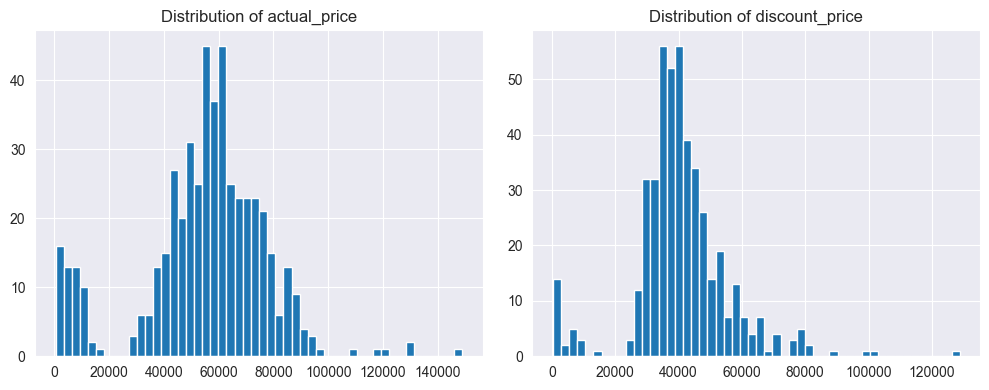

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['actual_price_num'].dropna(), bins=50)
plt.title('Distribution of actual_price')

plt.subplot(1,2,2)
plt.hist(df['discount_price_num'].dropna(), bins=50)
plt.title('Distribution of discount_price')
plt.tight_layout()
plt.show()

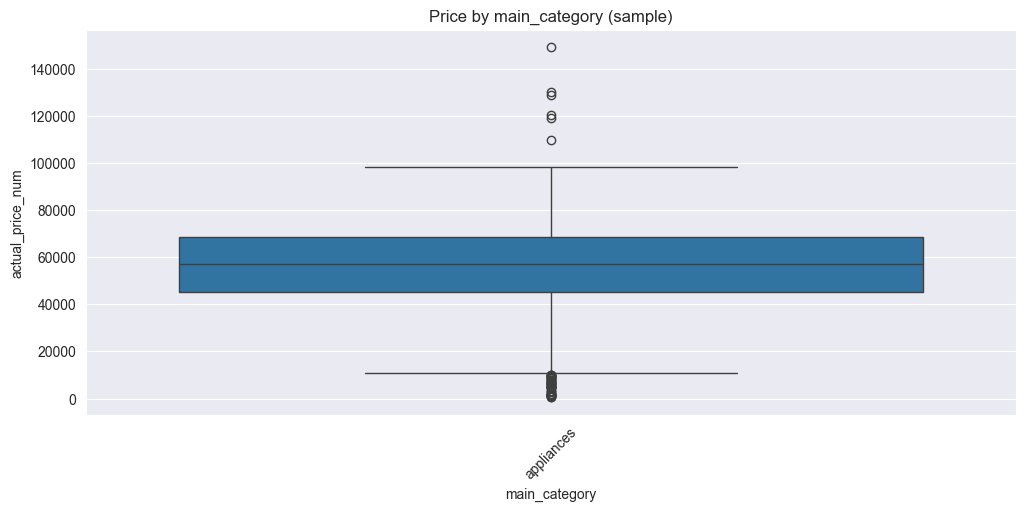

In [25]:
if 'main_category' in df.columns:
    plt.figure(figsize=(12,5))
    sns.boxplot(x='main_category', y='actual_price_num', data=df[df['actual_price_num'].notna()][:500]) # خذ 500 صف للتسريع
    plt.xticks(rotation=45)
    plt.title('Price by main_category (sample)')
    plt.show()

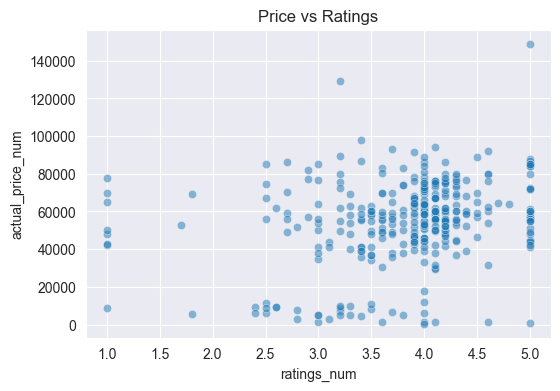

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='ratings_num', y='actual_price_num', data=df, alpha=0.5)
plt.title('Price vs Ratings')
plt.show()

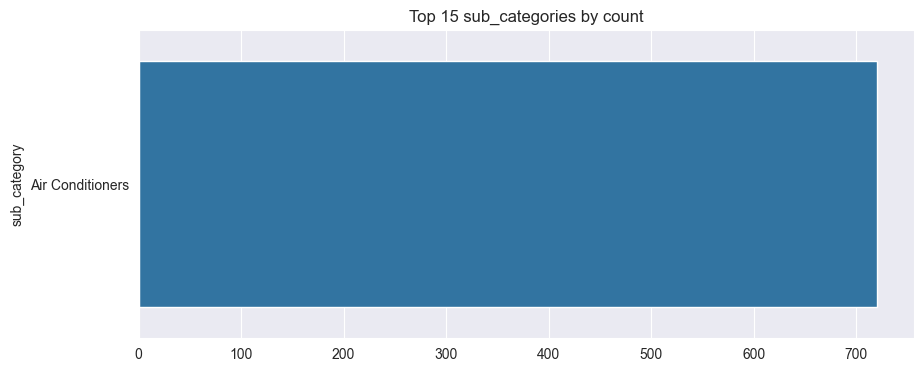

In [27]:
if 'sub_category' in df.columns:
    top_cats = df['sub_category'].value_counts().nlargest(15)
    plt.figure(figsize=(10,4))
    sns.barplot(x=top_cats.values, y=top_cats.index)
    plt.title('Top 15 sub_categories by count')
    plt.show()

In [28]:
def show_wordcloud(text, title=None):
    stopwords = set(STOPWORDS)
    wc = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, collocations=False).generate(text)
    plt.figure(figsize=(12,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    if title: plt.title(title)
    plt.show()

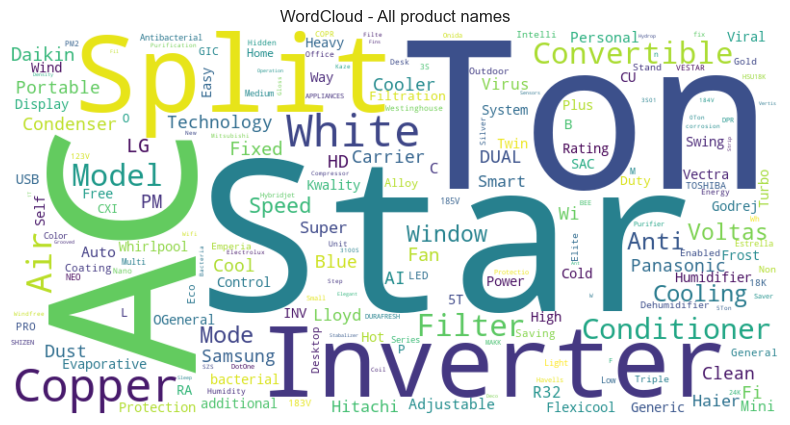

In [29]:
if 'name' in df.columns:
    text_all = " ".join(df['name'].astype(str).fillna('').tolist())
    show_wordcloud(text_all, "WordCloud - All product names")

In [30]:
if 'sub_category' in df.columns:
    sample_text = " ".join(df[df['sub_category'].fillna('')=='Air Condition']['name'].astype(str).tolist()[:1000])
    if sample_text:
        show_wordcloud(sample_text, "WordCloud - Air Condition names (sample)")

In [31]:
clean_path = "./data/cleaned_products.csv"
df.to_csv(clean_path, index=False)
print("Saved cleaned sample to:", clean_path)

Saved cleaned sample to: ./data/cleaned_products.csv


In [32]:
df

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_price_num,actual_price_num,ratings_num,no_of_ratings_num
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990",32999.0,58990.0,4.2,2255.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990",46490.0,75990.0,4.2,2948.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990",34490.0,61990.0,4.2,1206.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990",37990.0,68990.0,4.0,69.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790",34490.0,67790.0,4.1,630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Personal Air Conditioners Portable AC Mini Air...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/71RkCzQZyd...,https://www.amazon.in/Personal-Conditioners-Po...,NaN,NaN,"₹10,234","₹13,999",10234.0,13999.0,NaN,NaN
716,Air Conditioner Fan Personal Desk Fan Space Ai...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/719ujjLfw7...,https://www.amazon.in/Conditioner-Personal-Eva...,NaN,NaN,NaN,"₹9,881",NaN,9881.0,NaN,NaN
717,"Portable Air Conditioners, Personal Air Condit...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/71l59r1G-J...,https://www.amazon.in/Portable-Conditioners-Pe...,NaN,NaN,NaN,"₹6,361",NaN,6361.0,NaN,NaN
718,"Portable Air Conditioner Fan, Personal Air Coo...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/61GXC1nOlS...,https://www.amazon.in/Portable-Conditioner-Per...,2.8,207,NaN,"₹7,671",NaN,7671.0,2.8,207.0


In [33]:
df = df[df['actual_price_num'].notna()]

In [34]:
df_model = df.drop(columns=['image', 'link'])

In [35]:
INR_TO_EGP = 0.38

df['actual_price_egp'] = df['actual_price_num'] * INR_TO_EGP
df['discount_price_egp'] = df['discount_price_num'] * INR_TO_EGP

C:\Users\NoteBook\AppData\Local\Temp\ipykernel_10268\134505557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actual_price_egp'] = df['actual_price_num'] * INR_TO_EGP
C:\Users\NoteBook\AppData\Local\Temp\ipykernel_10268\134505557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discount_price_egp'] = df['discount_price_num'] * INR_TO_EGP


In [36]:
df

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_price_num,actual_price_num,ratings_num,no_of_ratings_num,actual_price_egp,discount_price_egp
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990",32999.0,58990.0,4.2,2255.0,22416.20,12539.62
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990",46490.0,75990.0,4.2,2948.0,28876.20,17666.20
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990",34490.0,61990.0,4.2,1206.0,23556.20,13106.20
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990",37990.0,68990.0,4.0,69.0,26216.20,14436.20
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790",34490.0,67790.0,4.1,630.0,25760.20,13106.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,Personal Air Conditioners Portable AC Mini Air...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/71RkCzQZyd...,https://www.amazon.in/Personal-Conditioners-Po...,NaN,NaN,"₹10,234","₹13,999",10234.0,13999.0,NaN,NaN,5319.62,3888.92
716,Air Conditioner Fan Personal Desk Fan Space Ai...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/719ujjLfw7...,https://www.amazon.in/Conditioner-Personal-Eva...,NaN,NaN,NaN,"₹9,881",NaN,9881.0,NaN,NaN,3754.78,NaN
717,"Portable Air Conditioners, Personal Air Condit...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/71l59r1G-J...,https://www.amazon.in/Portable-Conditioners-Pe...,NaN,NaN,NaN,"₹6,361",NaN,6361.0,NaN,NaN,2417.18,NaN
718,"Portable Air Conditioner Fan, Personal Air Coo...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/61GXC1nOlS...,https://www.amazon.in/Portable-Conditioner-Per...,2.8,207,NaN,"₹7,671",NaN,7671.0,2.8,207.0,2914.98,NaN


In [37]:
df_model = df.copy()

cols_to_drop = [
    'image',
    'link',
    'actual_price',
    'discount_price',
    'actual_price_num',
    'discount_price_num'
]

df_model = df_model.drop(columns=[c for c in cols_to_drop if c in df_model.columns])

df_model.head()

,name,main_category,sub_category,ratings,no_of_ratings,ratings_num,no_of_ratings_num,actual_price_egp,discount_price_egp
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255",4.2,2255.0,22416.2,12539.62
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948",4.2,2948.0,28876.2,17666.20
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206",4.2,1206.0,23556.2,13106.20
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,4.0,69.0,26216.2,14436.20
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,4.1,630.0,25760.2,13106.20


In [38]:
df_model['price_diff'] = df_model['actual_price_egp'] - df_model['discount_price_egp']

df_model['price_label_bin'] = 'Not Fair'
df_model.loc[
    df_model['discount_price_egp'].isna() | (df_model['price_diff'] == 0),
    'price_label_bin'
] = 'Fair'

df_model['price_label_bin'].value_counts()
df_model

,name,main_category,sub_category,ratings,no_of_ratings,ratings_num,no_of_ratings_num,actual_price_egp,discount_price_egp,price_diff,price_label_bin
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,"2,255",4.2,2255.0,22416.20,12539.62,9876.58,Not Fair
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,"2,948",4.2,2948.0,28876.20,17666.20,11210.00,Not Fair
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,"1,206",4.2,1206.0,23556.20,13106.20,10450.00,Not Fair
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69,4.0,69.0,26216.20,14436.20,11780.00,Not Fair
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630,4.1,630.0,25760.20,13106.20,12654.00,Not Fair
...,...,...,...,...,...,...,...,...,...,...,...
715,Personal Air Conditioners Portable AC Mini Air...,appliances,Air Conditioners,NaN,NaN,NaN,NaN,5319.62,3888.92,1430.70,Not Fair
716,Air Conditioner Fan Personal Desk Fan Space Ai...,appliances,Air Conditioners,NaN,NaN,NaN,NaN,3754.78,NaN,NaN,Fair
717,"Portable Air Conditioners, Personal Air Condit...",appliances,Air Conditioners,NaN,NaN,NaN,NaN,2417.18,NaN,NaN,Fair
718,"Portable Air Conditioner Fan, Personal Air Coo...",appliances,Air Conditioners,2.8,207,2.8,207.0,2914.98,NaN,NaN,Fair


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer

X = df_model.drop(columns=['price_label_bin'])
y = df_model['price_label_bin']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [40]:
text_col = 'name'
cat_cols = ['main_category', 'sub_category']
num_cols = ['ratings_num', 'no_of_ratings_num']

In [41]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    min_df=2,
    stop_words='english'
), text_col),

        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),

        ('num', num_pipeline, num_cols)
    ]
)

In [43]:
from sklearn.linear_model import LogisticRegression

log_reg_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(
    max_iter=3000,
    C=2.0,
    class_weight='balanced',
    solver='lbfgs'
))
])

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        class_weight='balanced',
        random_state=42
    ))
])

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train
log_reg_pipeline.fit(X_train, y_train)

# Predict
y_pred_lr = log_reg_pipeline.predict(X_test)

# Metrics
print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

print("\nClassification Report (Logistic):\n",
      classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.93

Classification Report (Logistic):
               precision    recall  f1-score   support

        Fair       0.56      1.00      0.72         9
    Not Fair       1.00      0.92      0.96        91

    accuracy                           0.93       100
   macro avg       0.78      0.96      0.84       100
weighted avg       0.96      0.93      0.94       100



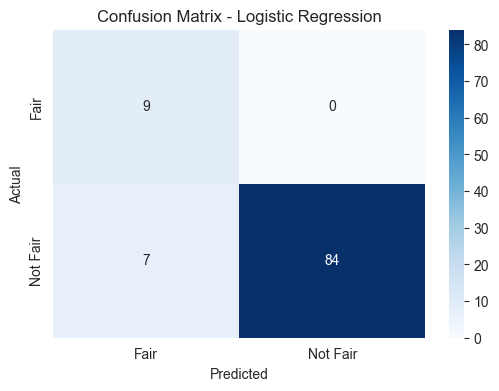

In [46]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=log_reg_pipeline.classes_)

plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d',
            xticklabels=log_reg_pipeline.classes_,
            yticklabels=log_reg_pipeline.classes_,
            cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [47]:
# Train
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)

# Metrics
print("Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):\n",
      classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.95

Classification Report (Random Forest):
               precision    recall  f1-score   support

        Fair       0.75      0.67      0.71         9
    Not Fair       0.97      0.98      0.97        91

    accuracy                           0.95       100
   macro avg       0.86      0.82      0.84       100
weighted avg       0.95      0.95      0.95       100



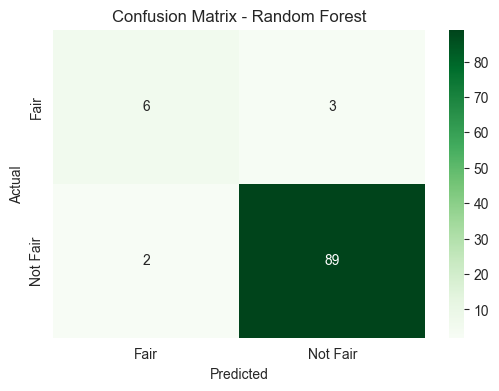

In [48]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf_pipeline.classes_)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d',
            xticklabels=rf_pipeline.classes_,
            yticklabels=rf_pipeline.classes_,
            cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [49]:
import joblib
import os

os.makedirs("models", exist_ok=True)

joblib.dump(rf_pipeline, "models/price_classifier_model.joblib")

print("✅ Model saved successfully")

✅ Model saved successfully


In [50]:
sample = X_test.iloc[[0]]
print("Actual:", y_test.iloc[0])
print("Predicted:", rf_pipeline.predict(sample)[0])

Actual: Not Fair
Predicted: Not Fair
